# Geometría Computacional y Diferencial
## Tarea 1: Triangulated Irregular Network (TIN)
### Presentado por: Oscar Velasco
### Presentado a: José Julián Jiménez Rincón

In [64]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.tri as mtri
from scipy.spatial import Delaunay
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
file = open('pts1000c.dat', 'r')
points = []
for i in file.readlines():
    ps = i.split()
    p = (float(ps[0]), float(ps[1]), float(ps[2]))
    points.append(p)

In [27]:
len(points)

1004

In [85]:
class TIN:
    
    def __init__(self, points):
        self.points = points
        self.tri = Delaunay([[i[0], i[1]] for i in self.points])
        
        self.x = [i[0] for i in self.points]
        self.y = [i[1] for i in self.points]
        self.z = [i[2] for i in self.points]
        
        norm = mpl.colors.Normalize(vmin = min(self.z), vmax = max(self.z))
        cmap = cm.hot
        m = cm.ScalarMappable(norm = norm, cmap = cmap)
        self.colors = m.to_rgba(self.z)
        # self.colors = [[i[0], i[1], i[2]] for i in colors]
        
        pred = pd.DataFrame()
        pred['x'] = self.x
        pred['y'] = self.y
        res = pd.DataFrame()
        res['z'] = self.z
        self.model = LinearRegression().fit(pred, res)
        
    def plot_elevation_2d(self):
        plt.triplot(self.x, self.y, self.tri.simplices, color = 'b')
        # plt.plot(self.x, self.y, 'o', color = 'g')
        #plt.scatter(self.x, self.y, c = self.colors)
        for i in range(len(self.x)):
            plt.plot(self.x[i], self.y[i], 'o', color = self.colors[i], markersize = 8)
        plt.title("Triangulación 2D para el Conjunto de Puntos", fontsize = 20)
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.grid()
        
    def plot_elevation_3d(self):
        ax = plt.axes(projection = '3d')
        plt.title("Triangulación 3D para el Conjunto de Puntos", fontsize = 20)
        plt.xlabel('X')
        plt.ylabel('Y')
        ax.set_zlabel('Z')
        plt.grid()
        ax.plot_trisurf(self.x, self.y, self.z, triangles = self.tri.simplices, cmap = cm.hot)
        
    def find_elevation(self, x, y):
        return self.model.predict(np.array([[x, y]]))[0][0]
    
    def plot_model(self):
        zp = []
        for i in self.points:
            z = self.find_elevation(i[0], i[1])
            zp.append(z)
        
        ax = plt.axes(projection = '3d')
        plt.title("Modelo Lineal 3D para el Conjunto de Puntos", fontsize = 20)
        plt.xlabel('X')
        plt.ylabel('Y')
        ax.set_zlabel('Z')
        plt.grid()
        ax.plot_trisurf(self.x, self.y, zp, triangles = tin1.tri.simplices, cmap = cm.winter);
    

In [86]:
tin1 = TIN(points)

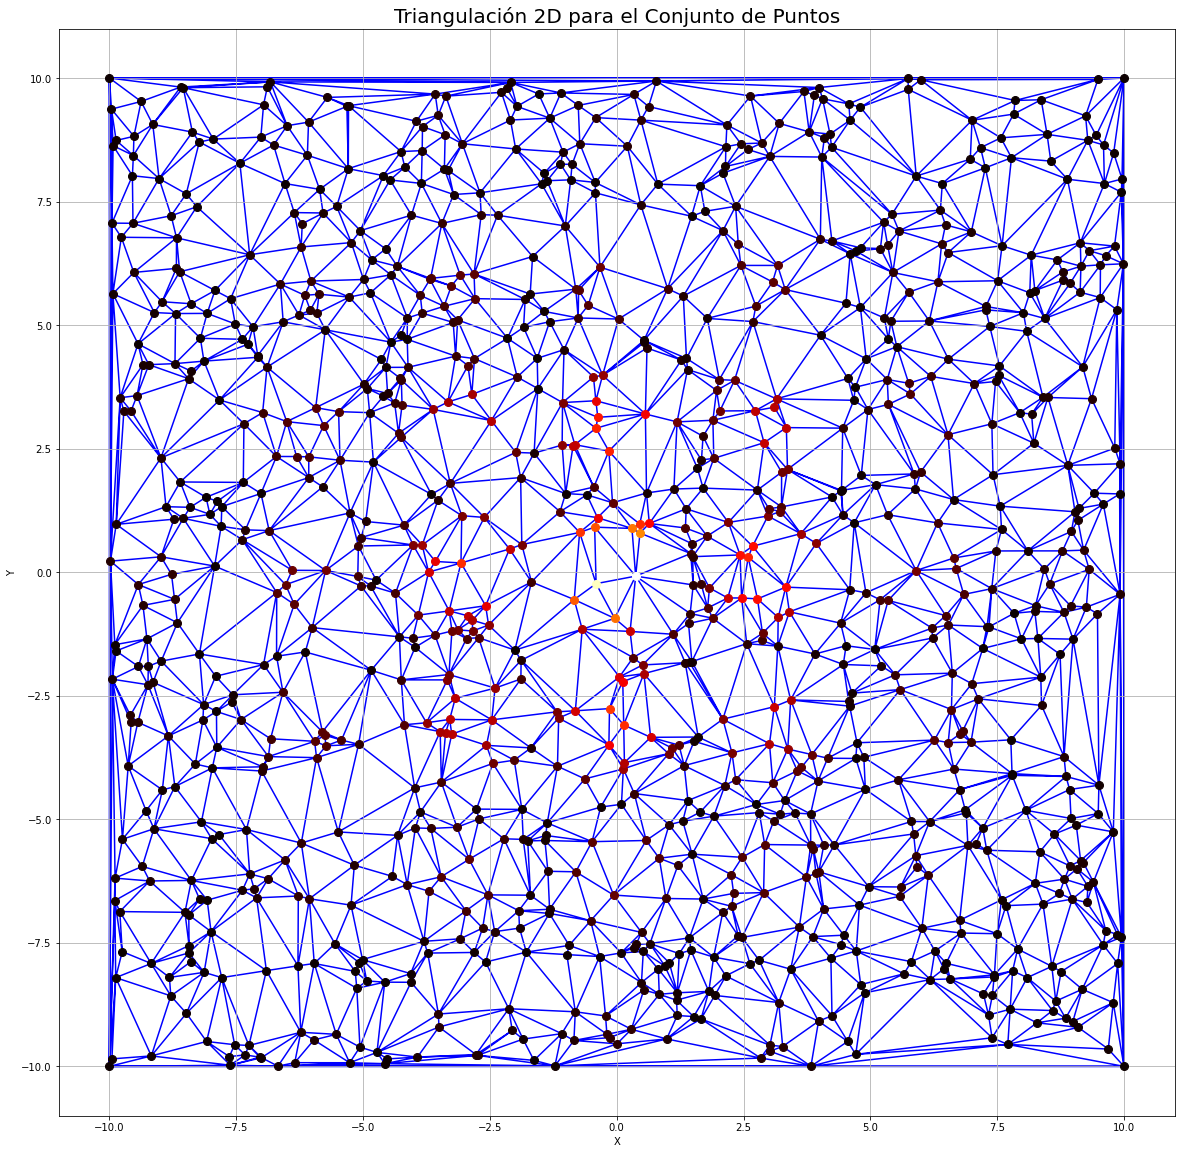

In [78]:
# test plot_elevation_2d
plt.figure(figsize = (20, 20))
tin1.plot_elevation_2d()

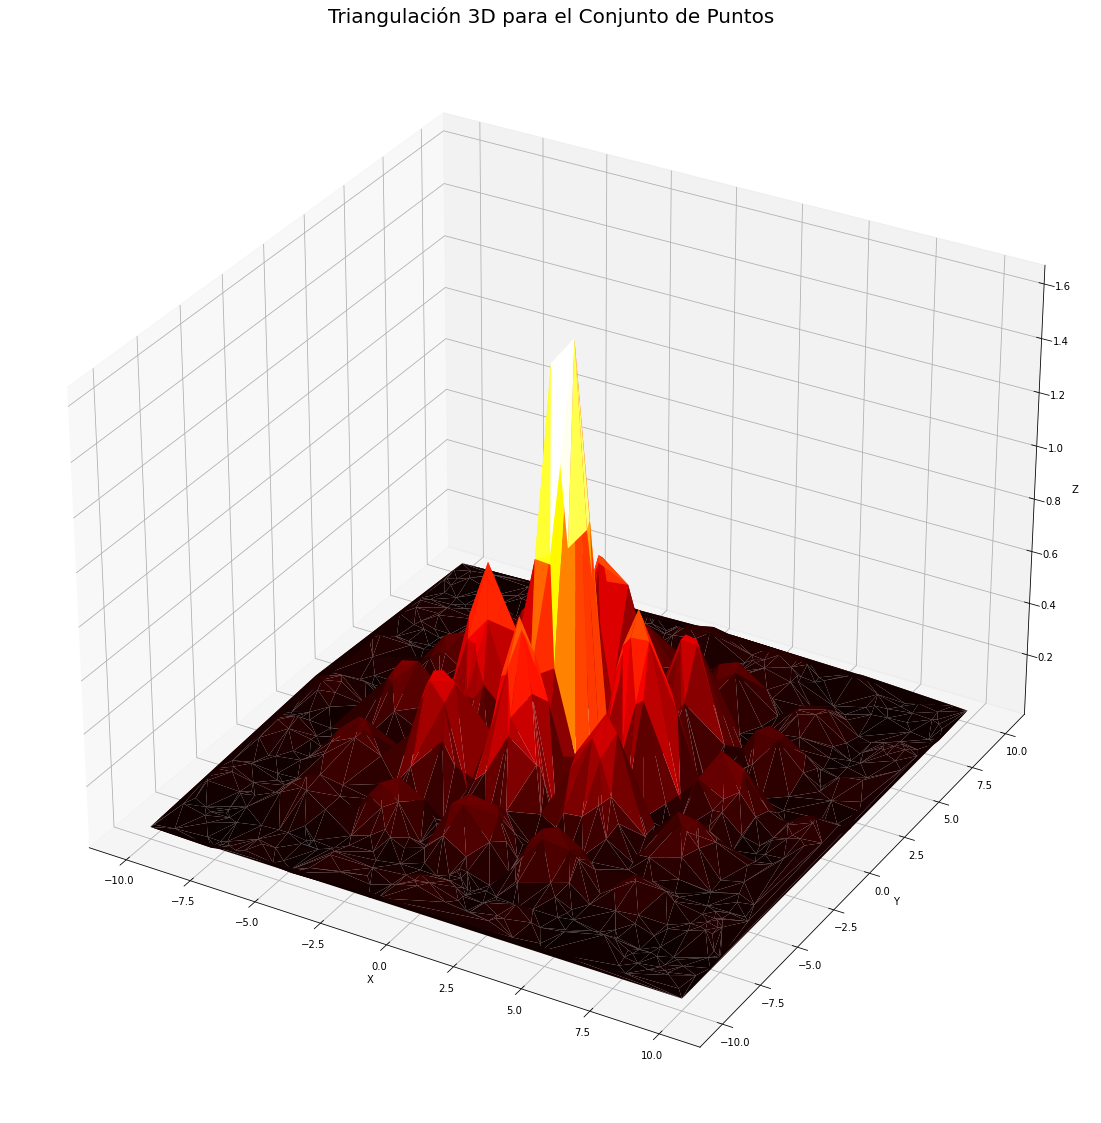

In [79]:
# test plot_elevation_3d
plt.figure(figsize = (20, 20))
tin1.plot_elevation_3d()

In [87]:
# test find_elevation
zp = []
for i in tin1.points:
    z = tin1.find_elevation(i[0], i[1])
    zp.append(z)

print('r2_score:', r2_score(tin1.z, zp))
# El resultado del r2_score nos dice que el modelo no se ajusta de la mejor manera a los datos

r2_score: 0.00017759081355839257


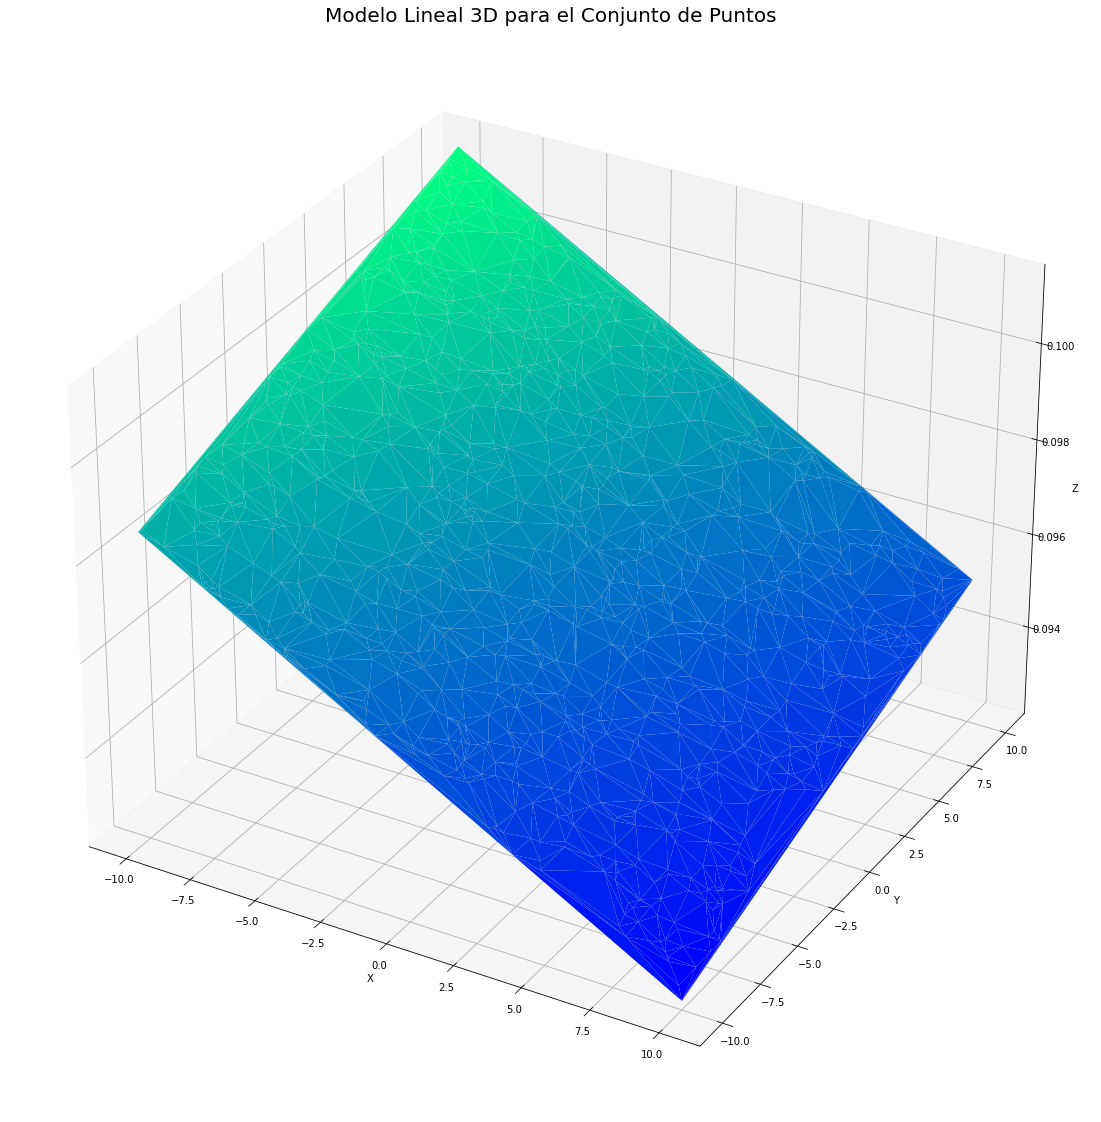

In [88]:
plt.figure(figsize = (20, 20))
tin1.plot_model()